<a href="https://colab.research.google.com/github/ci396/Yuqing-projects/blob/master/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive

drive.mount('/content/project1')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/project1


In [0]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import nltk
# REGULAR EXPRESSION
import re
import os

from sklearn import decomposition
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
#import three lists: titles and wikipedia synopses
titles = open('/content/project1/My Drive/Project1/title_list.txt').read().split('\n')
titles = titles[:100] #ensures that only the first 100 are read in

#The wiki synopses and imdb synopses of each movie is seperated by the keywords "BREAKS HERE". 
#Each synoposes may consist of multiple paragraphs.
synopses_wiki = open('/content/project1/My Drive/Project1/synopses_list_wiki.txt').read().split('\n BREAKS HERE')
synopses_wiki = synopses_wiki[:100]

synopses_imdb = open('/content/project1/My Drive/Project1/synopses_list_imdb.txt').read().split('\n BREAKS HERE')
synopses_imdb = synopses_imdb[:100]

#Combine imdb and wiki to get full synoposes for the top 100 movies. 
synopses = []
for i in range(len(synopses_wiki)):
    item = synopses_wiki[i] + synopses_imdb[i]
    synopses.append(item)
    
#Because these synopses have already been ordered in popularity order, 
#we just need to generate a list of ordered numbers for future usage.
ranks = range(len(titles))

In [0]:
# Use nltk's English stopwords.
stopwords = nltk.corpus.stopwords.words('english')

print ("We use " + str(len(stopwords)) + " stopwords from nltk library.")
print (stopwords[:20])


We use 179 stopwords from nltk library.
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


In [0]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

# tokenization and stemming
def tokenization_and_stemming(text):
    # exclude stop words and tokenize the document, generate a list of string 
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent) if word not in stopwords]

    filtered_tokens = []
    
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
            
    # stemming
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

# tokenization without stemming
def tokenization(text):
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent) if word not in stopwords]
    filtered_tokens = []
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [0]:
# tokenization and stemming
tokenization_and_stemming("she looked at her father's arm.")

['look', 'father', "'s", 'arm']

In [0]:
# 1. do tokenization and stemming for all the documents
# 2. also just do tokenization for all the documents
# the goal is to create a mapping from stemmed words to original tokenized words for result interpretation.
docs_stemmed = []
docs_tokenized = []
for i in synopses:
    tokenized_and_stemmed_results = tokenization_and_stemming(i)
    docs_stemmed.extend(tokenized_and_stemmed_results)
    
    tokenized_results = tokenization(i)
    docs_tokenized.extend(tokenized_results)

In [0]:
vocab_frame_dict = {docs_stemmed[x]:docs_tokenized[x] for x in range(len(docs_stemmed))}
print (vocab_frame_dict['arm'])

arms


AttributeError: ignored

In [0]:
# define vectorizer parameters
# TfidfVectorizer will help us to create tf-idf matrix
# max_df : maximum document frequency for the given word
# min_df : minimum document frequency for the given word
# max_features: maximum number of words
# use_idf: if not true, we only calculate tf
# stop_words : built-in stop words
# tokenizer: how to tokenize the document
# ngram_range: (min_value, max_value), eg. (1, 3) means the result will include 1-gram, 2-gram, 3-gram
tfidf_model = TfidfVectorizer(max_df=0.8, max_features=2000,
                                 min_df=0, stop_words='english',
                                 use_idf=True, tokenizer=tokenization_and_stemming, ngram_range=(1,3))

tfidf_matrix = tfidf_model.fit_transform(synopses) #fit the vectorizer to synopses

print ("In total, there are " + str(tfidf_matrix.shape[0]) + \
      " synoposes and " + str(tfidf_matrix.shape[1]) + " terms.")

In total, there are 100 synoposes and 2000 terms.


In [0]:
tfidf_model.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 0.8,
 'max_features': 2000,
 'min_df': 0,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': 'english',
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': <function __main__.tokenization_and_stemming>,
 'use_idf': True,
 'vocabulary': None}

In [0]:
# words
tf_selected_words = tfidf_model.get_feature_names()
tf_selected_words

["'d",
 "'m",
 "'s apart",
 "'s arm",
 "'s bodi",
 "'s death",
 "'s father",
 "'s friend",
 "'s home",
 "'s hous",
 "'s life",
 "'s marriag",
 "'s men",
 "'s mother",
 "'s murder",
 "'s offic",
 "'s plan",
 "'s son",
 "'s voic",
 "'s wife",
 'abandon',
 'abil',
 'abl',
 'aboard',
 'abus',
 'accept',
 'accid',
 'accident',
 'accompani',
 'accomplic',
 'accus',
 'acquaint',
 'act',
 'action',
 'actor',
 'actual',
 'adam',
 'address',
 'admir',
 'admit',
 'adrian',
 'advanc',
 'advantag',
 'adventur',
 'advis',
 'affair',
 'africa',
 'african',
 'african queen',
 'afterward',
 'age',
 'agent',
 'ago',
 'agre',
 'ahead',
 'aid',
 'aim',
 'air',
 'aircraft',
 'airport',
 'al',
 'albert',
 'alcohol',
 'alderaan',
 'alex',
 'alexand',
 'ali',
 'alic',
 'alien',
 'aliv',
 'allenbi',
 'allnut',
 'allow',
 'alon',
 'alreadi',
 'altern',
 'alvi',
 'alway',
 'ambush',
 'america',
 'american',
 'ami',
 'andi',
 "andi 's",
 'andrew',
 'angel',
 'angela',
 'anger',
 'angri',
 'angrili',
 'anim',
 'an

In [0]:
# tf-idf matrix
tfidf_matrix

<100x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 31769 stored elements in Compressed Sparse Row format>

In [0]:
# use cosine similarity to check the similarity for two documents
from sklearn.metrics.pairwise import cosine_similarity
cos_matrix = cosine_similarity(tfidf_matrix)
print (cos_matrix)

[[1.         0.01587253 0.01952566 ... 0.02251429 0.02280225 0.04400671]
 [0.01587253 1.         0.0314611  ... 0.01242858 0.01335847 0.01926311]
 [0.01952566 0.0314611  1.         ... 0.01612858 0.01253687 0.04145735]
 ...
 [0.02251429 0.01242858 0.01612858 ... 1.         0.03184383 0.0459994 ]
 [0.02280225 0.01335847 0.01253687 ... 0.03184383 1.         0.01976441]
 [0.04400671 0.01926311 0.04145735 ... 0.0459994  0.01976441 1.        ]]


In [0]:
# k-means clustering
from sklearn.cluster import KMeans

# number of clusters
num_clusters = 5
km = KMeans(n_clusters=num_clusters)
km.fit(tfidf_matrix)
clusters = km.labels_.tolist()

In [0]:
clusters

In [0]:
# create DataFrame films from all of the input files.
films = { 'title': titles, 'rank': ranks, 'synopsis': synopses, 'cluster': clusters}
frame = pd.DataFrame(films, index = [clusters] , columns = ['rank', 'title', 'cluster'])

In [0]:
films

In [0]:
print ("Number of films included in each cluster:")
frame['cluster'].value_counts().to_frame()

Number of films included in each cluster:


,cluster
2,44
1,24
3,13
4,10
0,9


In [0]:
print ("<Document clustering result by K-means>")

#km.cluster_centers_ denotes the importances of each items in centroid.
#We need to sort it in decreasing-order and get the top k items.
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

Cluster_keywords_summary = {}
for i in range(num_clusters):
    print ("Cluster " + str(i) + " words:", end='')
    Cluster_keywords_summary[i] = []
    for ind in order_centroids[i, :6]: #replace 6 with n words per cluster
        Cluster_keywords_summary[i].append(vocab_frame_dict[tf_selected_words[ind]])
        print (vocab_frame_dict[tf_selected_words[ind]] + ",", end='')
    print ()
    #Here ix means index, which is the clusterID of each item.
    #Without tolist, the values result from dataframe is <type 'numpy.ndarray'>
    cluster_movies = frame.ix[i]['title'].values.tolist()
    print ("Cluster " + str(i) + " titles (" + str(len(cluster_movies)) + " movies): ")
    print (", ".join(cluster_movies))
    print ()

<Document clustering result by K-means>
Cluster 0 words:michael,dorothy,vito,thorwald,corleone,e.t,
Cluster 0 titles (9 movies): 
The Godfather, The Wizard of Oz, The Godfather: Part II, E.T. the Extra-Terrestrial, Jaws, The Apartment, Annie Hall, Tootsie, Rear Window

Cluster 1 words:maria,captain,german,beale,nazis,karen,
Cluster 1 titles (24 movies): 
Schindler's List, Casablanca, Sunset Blvd., The Sound of Music, West Side Story, Star Wars, Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb, Amadeus, Apocalypse Now, Gladiator, From Here to Eternity, Saving Private Ryan, Raiders of the Lost Ark, My Fair Lady, Doctor Zhivago, Platoon, The Pianist, The Exorcist, Out of Africa, Terms of Endearment, Network, The African Queen, Mutiny on the Bounty, The Maltese Falcon

Cluster 2 words:george,kane,mike,henry,rocky,andy,
Cluster 2 titles (44 movies): 
The Shawshank Redemption, One Flew Over the Cuckoo's Nest, Gone with the Wind, Citizen Kane, Titanic, Lawrence of Arabia, 

In [0]:
# use pca to reduce dimensions to 2d for visibility, just want to see if there 2d can give us some insights
# this is not an appropriate method, just a guess.
pca = decomposition.PCA(n_components=2)
tfidf_matrix_np=tfidf_matrix.toarray()
pca.fit(tfidf_matrix_np)
X = pca.transform(tfidf_matrix_np)

xs, ys = X[:, 0], X[:, 1]

#set up colors per clusters using a dict
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e'}
#set up cluster names using a dict
cluster_names = {}
for i in range(num_clusters):
    cluster_names[i] = ", ".join(Cluster_keywords_summary[i])

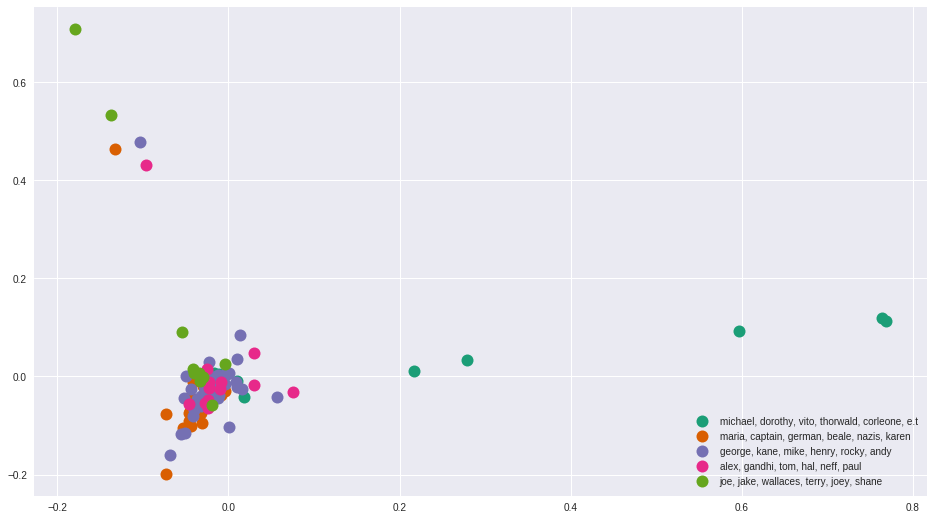

In [0]:
# %matplotlib inline 

#create data frame with PCA cluster results
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=titles)) 
groups = df.groupby(clusters)

# set up plot
fig, ax = plt.subplots(figsize=(16, 9))
#Set color for each cluster/group
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            label=cluster_names[name], color=cluster_colors[name], 
            mec='none')

ax.legend(numpoints=1,loc=4)  #show legend with only 1 point, position is right bottom.

plt.show() #show the plot

In [0]:
# Use LDA for clustering
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=5, learning_method = 'online')

In [0]:
# LDA requires integer values, keep first 3 digits
tfidf_matrix_lda = (tfidf_matrix * 100)
tfidf_matrix_lda = tfidf_matrix_lda.astype(int)

In [0]:
lda.fit(tfidf_matrix_lda)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=5, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=None, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [0]:
# topics and words matrix
topic_word = lda.components_
print(topic_word.shape)


(5, 2000)


In [0]:
n_top_words = 7
topic_keywords_list = []
for i, topic_dist in enumerate(topic_word):
    #Here we select top(n_top_words-1)
    lda_topic_words = np.array(tf_selected_words)[np.argsort(topic_dist)][:-n_top_words:-1] 
    for j in range(len(lda_topic_words)):
        lda_topic_words[j] = vocab_frame_dict[lda_topic_words[j]]
    topic_keywords_list.append(lda_topic_words.tolist())

In [0]:
# documents and topics matri
doc_topic = lda.transform(tfidf_matrix_lda)
print (doc_topic.shape)


(100, 5)


In [0]:
# print out the clusters and topics and titles of the movies
topic_doc_dict = {}
print ("<Document clustering result by LDA>")
for i in range(len(doc_topic)):
    topicID = doc_topic[i].argmax()
    if topicID not in topic_doc_dict:
        topic_doc_dict[topicID] = [titles[i]]
    else:
        topic_doc_dict[topicID].append(titles[i])
for i in topic_doc_dict:
    print ("Cluster " + str(i) + " words: " + ", ".join(topic_keywords_list[i]))
    print ("Cluster " + str(i) + " titles (" + str(len(topic_doc_dict[i])) + " movies): ")
    print (', '.join(topic_doc_dict[i]))
    print ()

<Document clustering result by LDA>
Cluster 4 words: michael, paul, forrestal, charlie, dunbar, schindler
Cluster 4 titles (22 movies): 
The Godfather, Schindler's List, Lawrence of Arabia, The Godfather: Part II, Forrest Gump, Star Wars, E.T. the Extra-Terrestrial, Chinatown, Gladiator, To Kill a Mockingbird, The Best Years of Our Lives, Platoon, Dances with Wolves, Goodfellas, The Deer Hunter, All Quiet on the Western Front, City Lights, A Place in the Sun, Rain Man, Terms of Endearment, The Green Mile, The African Queen

Cluster 2 words: joe, jerry, terry, beale, andy, mcmurphy
Cluster 2 titles (22 movies): 
The Shawshank Redemption, Raging Bull, One Flew Over the Cuckoo's Nest, Sunset Blvd., On the Waterfront, The Sound of Music, The Bridge on the River Kwai, Some Like It Hot, A Streetcar Named Desire, An American in Paris, Ben-Hur, Midnight Cowboy, Annie Hall, Fargo, Shane, Network, Nashville, The Graduate, American Graffiti, Rebel Without a Cause, North by Northwest, Yankee Doodl

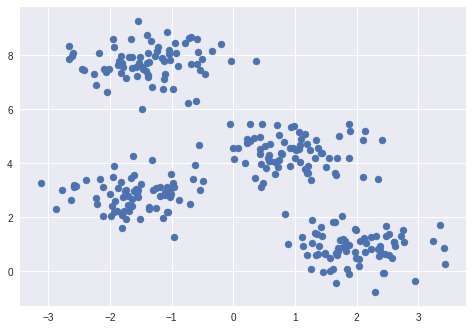

In [0]:
# An example of k-means, no relationship with above nlp case. The data is generated randomly.
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], s=50);

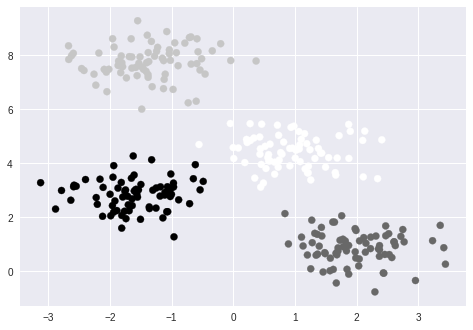

In [0]:
from sklearn.cluster import KMeans
est = KMeans(4)  # 4 clusters
est.fit(X)
y_kmeans = est.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50);

In [0]:
 class SSS:
    def canFinish(self, numCourses, prerequisites):
        """
        :type numCourses: int
        :type prerequisites: List[List[int]]
        :rtype: bool
        """
        graph = collections.defaultdict(list)
        for u, v in prerequisites:
            graph[u].append(v)
        visited = [0] * numCourses
        for i in range(numCourses):
            if not self.dfs(graph, visited, i):
                return False
        return True
            
    def dfs(self, graph, visited, i):
        if visited[i] == 1:
            return False
        if visited[i] == 2:
            return True
        visited[i] = 1
        for j in graph[i]:
            print(visited)
            if not self.dfs(graph, visited, j):
                return False
        visited[i] == 2
        return True

In [0]:
import collections
s = SSS()
s.canFinish(2, [[0,1],[1,0]])

[1, 0]
[1, 1]


False